In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Librerias de optimizacion
from scipy.optimize import minimize
from ipywidgets import interactive
from IPython.display import display

## Un vídeo muy interesante de lo que vimos la sesión pasada referente a la regresión lineal y el gradiente descendente (hace como mil siglos!):



*   https://www.youtube.com/watch?v=A6FiCDoz8_4

## Reto: 

Aplicar una regresión (evalua si debe ser lineal o polinómica) con lo que vimos en la clase pasada para el siguiente set de datos:



In [72]:
data_dict = {'Temperature' : [0, 20, 40, 60, 80, 100], 
             'Pressure'    : [0.0002, 0.0012, 0.0060, 0.0300, 0.0900, 0.2700]}
data = pd.DataFrame(data_dict)
data

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


## El problema de la clasificación:

<img src="https://www.skiphirenetwork.com/news/wp-content/uploads/2017/04/how-to-easily-classify-different-types-of-waste-min.jpg" width=600px>

Con base en lo que vimos en la última sesión, aplica un modelo de regresión líneal al siguiente dataset sintético que indica el tamaño de un tumor y si este es maligno o no:

In [0]:
data = {'Tamano'  : [9.5, 9, 8.5, 8, 6, 5.5, 5, 4.5], 
        'Maligno' : [1,   1,   1, 1, 0,   0, 0,   0]} 
df = pd.DataFrame(data) 

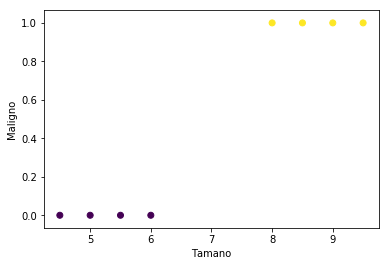

In [74]:
plt.scatter(df["Tamano"], df["Maligno"], c = df["Maligno"])
plt.xlabel("Tamano")
plt.ylabel("Maligno")
plt.show()

In [0]:
X = np.c_[np.ones(df.shape[0]), df["Tamano"].values]
y = df["Maligno"].values

In [0]:
def h_v(X, theta):
  return np.matmul(theta, X.transpose())

def costFunction_v(X, y, theta):
  h_theta = h_v(X, theta)
  return 0.5 * np.mean((h_theta - y)**2)

def gradCost_v(X, y, theta):
  h_theta = h_v(X, theta)
  return np.matmul((h_theta - y), X) / X.shape[0]

def gradientDescent_v(X, y, theta, alpha, iterations):
  theta_0 = np.array(theta, dtype = "float")
  for i in range(iterations):
    grad = gradCost_v(X, y, theta_0)
    theta_0 -= alpha * grad
  return theta_0

In [77]:
theta = gradientDescent_v(X, y, [0, 0], 0.01, 800)
print(theta)

[-0.5159983   0.15236699]


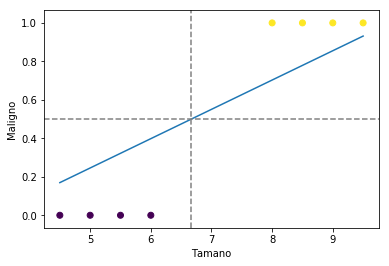

In [78]:
plt.scatter(df["Tamano"], df["Maligno"], c = df["Maligno"])
plt.plot(df["Tamano"], h_v(X, theta))
plt.axhline(0.5, color = "gray", linestyle='--')
plt.axvline((0.5 - theta[0]) / theta[1], color = "gray", linestyle='--')
plt.xlabel("Tamano")
plt.ylabel("Maligno")
plt.show()

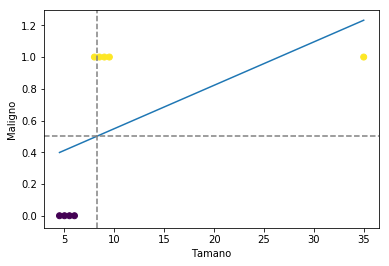

In [79]:
data = {'Tamano'  : [35, 9.5, 9, 8.5, 8, 6, 5.5, 5, 4.5], 
        'Maligno' : [1,   1,   1,   1, 1, 0,   0, 0,   0]} 
df = pd.DataFrame(data) 
df = pd.DataFrame(data) 

X = np.c_[np.ones(df.shape[0]), df["Tamano"].values]
y = df["Maligno"].values

theta = gradientDescent_v(X, y, [0, 0], 0.01, 800)

plt.scatter(df["Tamano"], df["Maligno"], c = df["Maligno"])
plt.plot(df["Tamano"], h_v(X, theta))
plt.axhline(0.5, color = "gray", linestyle='--')
plt.axvline((0.5 - theta[0]) / theta[1], color = "gray", linestyle='--')
plt.xlabel("Tamano")
plt.ylabel("Maligno")
plt.show()

Usar una función de regresión para un problema de clasificación no es una buena idea, en particular si tenemos casos atípicos como el mostrado en el ejemplo, además, la interpretación de la salida en el modelo de regresión no es clara para el caso en el que la salida sea menor que cero o mayor que uno. En conclusión, es necesario usar otra aproximación en la cual la hipótesis $h_\theta(x)$ cumpla que $0 \leq h_\theta \leq 1$, esto se puede cumplir poniendo la expresión 
$\theta\, (x^{(i)})^T
= \theta_0\,x^{(i)}_0 + \theta_1\, x^{(i)}_0 + \cdots + \theta_n\,x^{(i)}_n$, dentro de una función logística.

## Función logística:

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

In [0]:
def logistic(z):
  return 1.0/(1.0 + np.exp(-z))

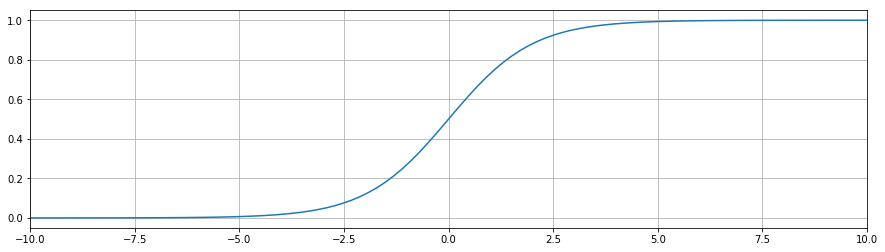

In [81]:
x = np.linspace(-10, 10, num = 100)
plt.figure(figsize=(15,4))
plt.plot(x, logistic(x))
plt.xlim(-10,10)
plt.grid()
plt.show()

## Función de Costo

La definición que vamos a usar para la función de costo de la regresión logística está definida como:

$$
J(\theta) = \sum_{i=1}^{m} \text{costo}(h_\theta(x), y^{(i)})
$$
donde
$$
\begin{align}
\text{costo}(h_\theta(x), y^{(i)}) &= -\log(h_\theta(x)) \quad \text{si } y = 1 \\
\text{costo}(h_\theta(x), y^{(i)}) &= -\log(1 - h_\theta(x)) \quad \text{si } y = 0
\end{align}
$$

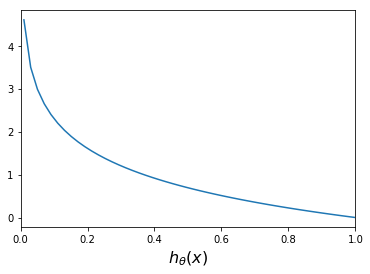

In [82]:
x = np.linspace(0.01, 1)
plt.plot(x, -np.log(x))
plt.xlabel(r"$h_\theta(x)$",fontsize=16)
plt.xlim(0,1)
plt.show()

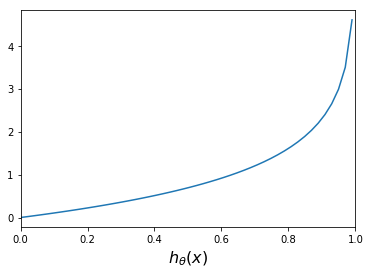

In [83]:
x = np.linspace(0, 0.99)
plt.plot(x, -np.log(1 - x))
plt.xlabel(r"$h_\theta(x)$",fontsize=16)
plt.xlim(0,1)
plt.show()

La definición para la función de perdida se puede comprimir mediante la expresión $ -y\,\log(h_\theta(x)) - (1 - y) \,\log(1 - h_\theta(x))$

Con lo cual la función de costo queda:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y\,\log(h_\theta(x)) + (1 - y) \,\log(1 - h_\theta(x))]
$$

Recordemos el algoritmo del gradiente desendente:

>__Repetir hasta que converja : {__
$$
\theta_j := \theta_j - \alpha \frac{\partial J}{\partial \theta_j}
$$
__}__

Con lo cual aplicando la función de costo para la regresión logística se tiene de manera concreta:

>__Repetir hasta que converja : {__
$$
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right)
$$
__}__

Con lo cual, aplicando el gradiente descendiente como en la sesión anterior, tenemos entonces que:

$$
\begin{align}
\frac{\partial J}{\partial \theta_0} &= \frac{1}{m}\sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right) \\
\frac{\partial J}{\partial \theta_1} &= \frac{1}{m}\sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right) x^{(i)}
\end{align}
$$

# Entrenamiento del modelo

In [84]:
# Descargando la data
!wget https://raw.githubusercontent.com/nicolasggiraldo/Curso_ML/master/Logistic_Regression/data/ex2data1.txt

--2019-08-02 17:25:58--  https://raw.githubusercontent.com/nicolasggiraldo/Curso_ML/master/Logistic_Regression/data/ex2data1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘ex2data1.txt.2’

ex2data1.txt.2      100%[===================>]   3.69K  --.-KB/s    in 0s      

2019-08-02 17:25:58 (46.5 MB/s) - ‘ex2data1.txt.2’ saved [3775/3775]



Supongamos que tenemos datos históricos de aspirantes a una Universidad y que se desea construir un modelo que indique la propensión de un aplicante a pasar a dicha Universidad dado el resultado de dos exámenes que se realizan.

In [85]:
# Carguemos el dataframe con la data de entrenamiento:

data = pd.read_csv("/content/ex2data1.txt",
                   names = ["Exam_1", "Exam_2", "y"])

X = np.c_[np.ones(data.shape[0]), data[["Exam_1","Exam_2"]].values]
y = data["y"].values

data.head()

,Exam_1,Exam_2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Hagamos una gráfica de los datos:

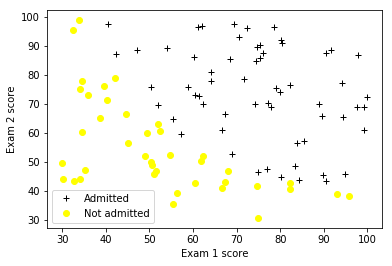

In [86]:
plt.plot(data[data["y"] == 1]["Exam_1"], 
         data[data["y"] == 1]["Exam_2"], 
         "+", label = "Admitted", color = "black")
plt.plot(data[data["y"] == 0]["Exam_1"], 
         data[data["y"] == 0]["Exam_2"], 
         'o', label = "Not admitted", color = "yellow")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc = "lower left")
plt.show()

Procedamos a construir la hipótesis, para esto debemos construir previamente una función que calcule la función sigmoide:

In [0]:
def sigmoid(z):
    return 1./(1.+np.exp(-z))

def h(theta, X):
    return sigmoid(np.matmul(X, theta))

#h([0,0,0], np.c_[np.ones(data.shape[0]), data[["Exam_1","Exam_2"]].values])

Con la función de hipótesis procedamos a definir el costo:

In [88]:
def costFunction(theta, X, y):
    h_theta = h(theta, X)
    return -np.mean(y * np.log(h_theta) + (1 - y) * np.log(1 - h_theta + 1e-6))

cost= costFunction([-24,0.2,0.2], X = X, y = y)
print(cost)

0.21832924203965537


Procedamos a encontrar los parámetros óptimos que minimizan la función de costo:

In [89]:
min_val = minimize(lambda theta : costFunction(theta, X = X, y = y), [0,0,0])
theta_sol = min_val.x
theta_sol

array([-25.16127638,   0.20623138,   0.20147109])

## La frontera de decisión

In order to get our discrete 0 or 1 classification, we can translate the output of the hypothesis function as follows:

Para definir nuestros valores discretos 0 o 1, podemos aplicar la siguiente regla:

$$
\begin{align}
h_\theta(x) \geq 0.5 &\to y = 1 \\
h_\theta(x) < 0.5     &\to y = 0
\end{align}
$$

Esto se da cuando $\theta_0\,x_0 + \theta_1\, x_0 + \cdots + \theta_n\,x_n = 0$, lo cual define la frontera de decisión, esta es una línea que separa los casos en donde definimos que $y=0$ o  $y=1$.

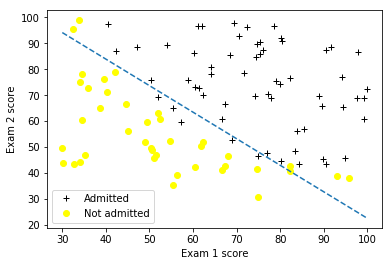

In [90]:
plt.plot(data[data["y"] == 1]["Exam_1"], 
         data[data["y"] == 1]["Exam_2"], 
         "+", label = "Admitted", color = "black")
plt.plot(data[data["y"] == 0]["Exam_1"], 
         data[data["y"] == 0]["Exam_2"], 
         'o', label = "Not admitted", color = "yellow")
x1 = np.linspace(data["Exam_1"].min(), data["Exam_1"].max(), 100)
plt.plot(x1,-(theta_sol[0] + theta_sol[1] * x1) / theta_sol[2], '--')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc = "lower left")
plt.show()

Predigamos valores

In [0]:
def predict_logistic(theta, X):
    return h(theta, X)

In [92]:
predict_logistic(theta_sol, [1, 45, 85])

0.7762904493041266

In [93]:
predict = [1 if x >= 0.5 else 0 for x in predict_logistic(theta_sol, X)]
np.mean(predict == y)

0.89